# Experiment of fractional exponent to particle filter

1. generate some samples
1. estimate the distribution (discrete)
1. generate reduced distributions by different processes
    1. proc1
        1. directly apply the fractional exponent to the estimated dist with normalization
    1. proc2
        1. calculate weights (proposed method!)
        1. resampling
        1. estimate the distribution based on the resampled ones
1. compare the two distributions


In [1]:
import random
import math
import matplotlib.pyplot as plt

# generate some samples

In [2]:
rng = [0, 100]
dlt = 0.05
n_samples = 300
samples = []
for i in range(n_samples):
    samples.append(random.uniform(rng[0] + (rng[1]-rng[0])*0.1, rng[1] - (rng[1]-rng[0])*0.1))

# estimate the distribution (discrete)

In [3]:
sigma = 5
k = lambda x1, x2: math.exp(-(x1 - x2)**2/sigma/sigma)
x = rng[0]
N = int((rng[1]-rng[0])/dlt+1)
x_axis = []
p = [0] * N
for i in range(N):
    x = rng[0] + i * dlt
    x_axis += [x]
    for s in samples:
        p[i] += k(x, s)
sum_p = sum(p) * dlt
for i in range(len(p)):
    p[i] /= sum_p

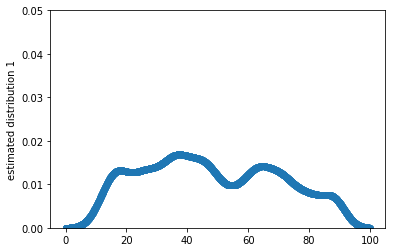

sum: 1.000000000000002


In [4]:
plt.scatter(x_axis, p)
plt.ylabel('estimated distribution 1')
plt.ylim(0, 0.05)
plt.show()
print('sum: ' + str(sum(p)*dlt))

# generate reduced distributions by different processes

In [5]:
omega = 0.5

# proc1
1. directly apply the fractional exponent to the estimated dist with normalization

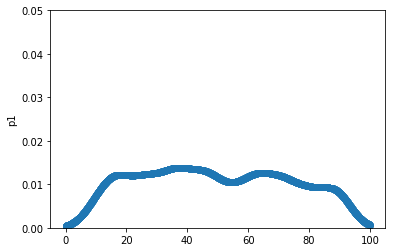

sum: 1.0000000000000016


In [6]:
p1 = [0] * len(p)
sum_p1 = 0
for i in range(len(p)):
    p1[i] = math.pow(p[i], omega)
    sum_p1 += p1[i] * dlt
for i in range(len(p1)):
    p1[i] /= sum_p1
plt.scatter(x_axis, p1)
plt.ylabel('p1')
plt.ylim(0, 0.05)
plt.show()
print('sum: ' + str(sum(p1)*dlt))

# proc2
1. calculate weights (proposed method!)
1. resampling
1. estimate the distribution based on the resampled ones

# compare the two distributions